## Descripción del dataset: Pima Indians Diabetes

El **Pima Indians Diabetes Dataset** es un conjunto de datos clásico en Machine Learning y bioestadística, recopilado por el *National Institute of Diabetes and Digestive and Kidney Diseases*.  
Su propósito es **predecir la aparición de diabetes tipo 2** en mujeres de origen **pima** (una población indígena del sur de Arizona, EE.UU.), a partir de diversas variables clínicas y demográficas.

### Características principales:
- **Número de registros:** 392 (en esta versión limpia, el original tenía 768).  
- **Número de atributos (features):** 8 variables predictoras + 1 variable objetivo.  
- **Población:** Mujeres de al menos 21 años de edad de la etnia Pima.  
- **Tarea principal:** Clasificación binaria → determinar si una paciente tiene diabetes (`Outcome = 1`) o no (`Outcome = 0`).

### Variables:
1. **Pregnancies** → Número de embarazos.  
2. **Glucose** → Concentración de glucosa en plasma después de 2 horas en una prueba de tolerancia a la glucosa.  
3. **BloodPressure** → Presión arterial diastólica (mm Hg).  
4. **SkinThickness** → Espesor del pliegue cutáneo del tríceps (mm).  
5. **Insulin** → Nivel sérico de insulina (mu U/ml).  
6. **BMI** → Índice de masa corporal (peso en kg / altura² en m²).  
7. **DiabetesPedigreeFunction** → Probabilidad de diabetes basada en antecedentes familiares.  
8. **Age** → Edad en años.  
9. **Outcome** → Variable objetivo:  
   - `0` = No tiene diabetes  
   - `1` = Tiene diabetes  

### Relevancia:
Este dataset es ampliamente utilizado en cursos de **Inteligencia Artificial y Machine Learning** para enseñar:
- Procesamiento y limpieza de datos biomédicos.  
- Métodos de clasificación supervisada (KNN, regresión logística, Random Forest, SVM, redes neuronales, etc.).  
- Importancia de la normalización y estandarización en algoritmos basados en distancias.  

---


## Paso 1: Cargar la base de datos  
Cargamos el CSV en un `DataFrame` de `pandas`. Si tu archivo no se llama exactamente `cleaned_dataset.csv`, ajusta la ruta.

In [3]:
import pandas as pd
from pathlib import Path
import os

df = pd.read_csv("cleaned_dataset.csv")

display(df.head())


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,0,129,110,46,130,67.1,0.319,26,1
1,0,180,78,63,14,59.4,2.420,25,1
2,3,123,100,35,240,57.3,0.880,22,0
3,1,88,30,42,99,55.0,0.496,26,1
4,0,162,76,56,100,53.2,0.759,25,1


## Paso 2: Crear subconjuntos con 20 datos de **entrenamiento** y 20 de **testeo**
Seleccionaremos 40 muestras: 20 para entrenar y 20 para evaluar.

In [4]:
from sklearn.model_selection import train_test_split

# Seleccionar 40 muestras del dataset cargado (20 para entrenamiento, 20 para testeo)
if 'df' not in locals():
    raise ValueError("El DataFrame 'df' no está definido. Asegúrate de ejecutar el Paso 1 antes de continuar.")

# Dividir el dataset en entrenamiento y testeo (20/20)
train, test = train_test_split(df, test_size=0.5, stratify=df['Outcome'], random_state=42)

# Seleccionar las primeras 20 muestras de cada conjunto
train_subset = train.iloc[:20]
test_subset = test.iloc[:20]

print("Conjunto de entrenamiento (20 muestras):")
print(train_subset)
print("\nConjunto de testeo (20 muestras):")
print(test_subset)

Conjunto de entrenamiento (20 muestras):
     Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
89             1       87              68              34       77  37.6   
173            8      155              62              26      495  34.0   
367            4       99              76              15       51  23.2   
296            1       89              66              23       94  28.1   
78             2      146              76              35      194  38.2   
52             1      128              48              45      194  40.5   
60             5      158              84              41      210  39.4   
30             1      103              30              38       83  43.3   
218            4      123              80              15      176  32.0   
93             0       95              85              25       36  37.4   
247            2      106              64              35      119  30.5   
91            10      148              84      

## Paso 3: Implementar la función de distancia euclidiana

**Instrucciones:**
- Escribe una función en Python que reciba dos vectores y calcule la distancia euclidiana entre ellos.
- Utiliza la siguiente fórmula matemática para la distancia euclidiana entre dos vectores $x$ y $y$ de $n$ dimensiones:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

- Prueba tu función con los siguientes dos ejemplos (cada vector corresponde a una fila del dataset):

| Embarazos | Glucosa | Presión Arterial | Grosor Piel | Insulina | IMC  | Función Hereditaria | Edad | Resultado |
|-----------|---------|------------------|-------------|----------|------|---------------------|------|-----------|
|     1     |   106   |        70        |      28     |   135    | 34.2 |        0.142        |  22  |     0     |
|     2     |   102   |        86        |      36     |   120    | 45.5 |        0.127        |  23  |     1     |

- Calcula la distancia euclidiana a mano y luego verifica que el resultado de tu función sea el mismo.
- La función debe imprimir el resultado del cálculo de la distancia euclidiana con los datos presentados.



In [5]:
import numpy as np

def euclidean_distance(vector1, vector2):
    """Calcula la distancia euclidiana entre dos vectores."""
    if len(vector1) != len(vector2):
        raise ValueError("Los vectores deben tener la misma longitud.")
    return np.sqrt(np.sum((np.array(vector1) - np.array(vector2)) ** 2))

# Ejemplo de prueba
vector_a = [1, 106, 70, 28, 135, 34.2, 0.142, 22]
vector_b = [2, 102, 86, 36, 120, 45.5, 0.127, 23]

distance = euclidean_distance(vector_a, vector_b)
print(f"La distancia euclidiana entre los vectores es: {distance:.4f}")

La distancia euclidiana entre los vectores es: 26.2810


## Paso 4: Implementar un clasificador KNN básico

**Instrucciones:**
- Escribe una función que, dado un punto de prueba, calcule la distancia a todos los puntos de entrenamiento utilizando tu función de distancia euclidiana.
- Selecciona los **k = 3** vecinos más cercanos y predice la clase mayoritaria entre ellos.
- Aplica tu función a las 10 muestras de prueba obtenidas previamente, utilizando las 10 muestras de entrenamiento como referencia.
- El script debe imprimir una tabla comparando el valor real de `Resultado` de cada muestra de prueba con el valor predicho por tu algoritmo.
- Considere que las tablas se pueden codificar con un formato similar al que se muestra en el siguiente código:

In [6]:
import numpy as np
from collections import Counter

def knn_predict(train_data, train_labels, test_point, k=3):
    """
    Predice la clase de test_point usando los k vecinos más cercanos.
    
    Parámetros:
    train_data: array-like, datos de entrenamiento
    train_labels: array-like, etiquetas de entrenamiento
    test_point: array-like, punto a clasificar
    k: int, número de vecinos a considerar
    
    Retorna:
    int: clase predicha (0 o 1)
    """
    # Calcular distancias a todos los puntos de entrenamiento
    distances = []
    for idx, train_point in enumerate(train_data):
        dist = euclidean_distance(test_point, train_point)
        distances.append((dist, train_labels[idx]))
    
    # Ordenar por distancia y obtener los k vecinos más cercanos
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    
    # Obtener las etiquetas de los k vecinos
    k_nearest_labels = [label for _, label in k_nearest]
    
    # Votación mayoritaria
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Verificar que tenemos los datos de entrenamiento y prueba
if 'train_subset' not in locals() or 'test_subset' not in locals():
    raise ValueError("Ejecuta el Paso 2 primero para obtener los conjuntos de entrenamiento y prueba")

# Preparar los datos
X_train = train_subset.drop('Outcome', axis=1).values
y_train = train_subset['Outcome'].values
X_test = test_subset.drop('Outcome', axis=1).values
y_test = test_subset['Outcome'].values

# Realizar predicciones para cada punto de prueba
predictions = []
for test_point in X_test:
    pred = knn_predict(X_train, y_train, test_point, k=3)
    predictions.append(pred)

# Crear tabla de comparación
print("Comparación de predicciones vs valores reales:")
print("\n{:<5} {:<10} {:<10} {:<10}".format("No.", "Real", "Predicho", "¿Correcto?"))
print("-" * 35)

correct = 0
for i, (real, pred) in enumerate(zip(y_test, predictions), 1):
    is_correct = real == pred
    if is_correct:
        correct += 1
    print("{:<5} {:<10} {:<10} {:<10}".format(
        i, real, pred, "✓" if is_correct else "✗"
    ))

# Calcular y mostrar accuracy
accuracy = correct / len(y_test)
print(f"\nPrecisión del modelo: {accuracy:.2%}")

Comparación de predicciones vs valores reales:

No.   Real       Predicho   ¿Correcto?
-----------------------------------
1     0          0          ✓         
2     0          0          ✓         
3     0          0          ✓         
4     1          0          ✗         
5     1          0          ✗         
6     0          0          ✓         
7     1          0          ✗         
8     1          1          ✓         
9     0          0          ✓         
10    1          1          ✓         
11    0          0          ✓         
12    0          0          ✓         
13    0          0          ✓         
14    0          1          ✗         
15    0          0          ✓         
16    0          0          ✓         
17    1          0          ✗         
18    1          0          ✗         
19    1          0          ✗         
20    0          0          ✓         

Precisión del modelo: 65.00%


## Paso 5: Usar toda la data con separación 80% entrenamiento / 20% testeo  

### Pasos:
1. Cargar todo el dataset.  
2. Separar variables (X) y etiquetas (y).  
3. Aplicar `train_test_split` con 80% para entrenamiento y 20% para testeo.  
4. Mantener la proporción de clases usando estratificación.  
5. Guardar los conjuntos de datos para usarlos en KNN.  

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# Verificar que el dataset está cargado
if 'df' not in locals():
    raise ValueError("El DataFrame 'df' no está definido. Ejecuta el Paso 1 primero.")

# Separar features (X) y etiquetas (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, 
    test_size=0.2,           # 20% para prueba
    random_state=42,         # Para reproducibilidad
    stratify=y               # Mantener proporción de clases
)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train_full: {X_train_full.shape}")
print(f"X_test_full: {X_test_full.shape}")
print("\nDistribución de clases:")
print("\nConjunto de entrenamiento:")
print(y_train_full.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
print("\nConjunto de prueba:")
print(y_test_full.value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Dimensiones de los conjuntos de datos:
X_train_full: (313, 8)
X_test_full: (79, 8)

Distribución de clases:

Conjunto de entrenamiento:
Outcome
0    66.77%
1    33.23%
Name: proportion, dtype: object

Conjunto de prueba:
Outcome
0    67.09%
1    32.91%
Name: proportion, dtype: object


## Paso 6: Entrenar un KNN con los datos sin escalar (crudos) y calcular accuracy  

### Pasos:
1. Definir el valor de **k = 3** y el metodo **Euclidiano**.  
2. Entrenar el modelo KNN con los datos crudos (sin normalizar/estandarizar).  
3. Predecir las clases del conjunto de test.  
4. Calcular el **accuracy** comparando predicciones con etiquetas reales.  
5. Guardar el resultado para la tabla comparativa.  


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Verificar que tenemos los datos necesarios
if 'X_train_full' not in locals():
    raise ValueError("Ejecuta el Paso 5 primero para obtener los conjuntos de entrenamiento y prueba")

# Crear y entrenar el modelo KNN con k=3
knn_raw = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_raw.fit(X_train_full, y_train_full)

# Realizar predicciones
y_pred_raw = knn_raw.predict(X_test_full)

# Calcular accuracy
accuracy_raw = accuracy_score(y_test_full, y_pred_raw)

# Guardar el resultado para la tabla comparativa
accuracy_results = {
    'Sin escalar': accuracy_raw
}

# Mostrar resultados detallados
print("Resultados del modelo KNN con datos sin escalar:")
print("-" * 50)
print(f"Accuracy: {accuracy_raw:.4f}")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test_full, y_pred_raw))

Resultados del modelo KNN con datos sin escalar:
--------------------------------------------------
Accuracy: 0.8101

Reporte de clasificación detallado:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        53
           1       0.79      0.58      0.67        26

    accuracy                           0.81        79
   macro avg       0.80      0.75      0.77        79
weighted avg       0.81      0.81      0.80        79



## Paso 7: Normalizar (Min-Max scaling) y entrenar KNN, luego calcular accuracy  

### Pasos:
1. Aplicar **normalización Min-Max** a los datos de entrenamiento y test.  
2. Entrenar el modelo KNN con los datos normalizados.  
3. Predecir las clases del conjunto de test.  
4. Calcular el **accuracy** del modelo.  
5. Guardar el resultado para la tabla comparativa.  


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Verificar que tenemos los datos necesarios
if 'X_train_full' not in locals():
    raise ValueError("Ejecuta el Paso 5 primero para obtener los conjuntos de entrenamiento y prueba")

# Crear y ajustar el normalizador Min-Max
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_full)
X_test_normalized = scaler.transform(X_test_full)

# Crear y entrenar el modelo KNN con k=3
knn_normalized = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_normalized.fit(X_train_normalized, y_train_full)

# Realizar predicciones
y_pred_normalized = knn_normalized.predict(X_test_normalized)

# Calcular accuracy
accuracy_normalized = accuracy_score(y_test_full, y_pred_normalized)

# Actualizar el diccionario de resultados
accuracy_results['Normalizado (Min-Max)'] = accuracy_normalized

# Mostrar resultados detallados
print("Resultados del modelo KNN con datos normalizados (Min-Max):")
print("-" * 60)
print(f"Accuracy: {accuracy_normalized:.4f}")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test_full, y_pred_normalized))

# Comparar con los resultados anteriores
print("\nComparación de accuracies hasta ahora:")
for method, acc in accuracy_results.items():
    print(f"{method}: {acc:.4f}")

Resultados del modelo KNN con datos normalizados (Min-Max):
------------------------------------------------------------
Accuracy: 0.7342

Reporte de clasificación detallado:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.65      0.42      0.51        26

    accuracy                           0.73        79
   macro avg       0.70      0.65      0.66        79
weighted avg       0.72      0.73      0.72        79


Comparación de accuracies hasta ahora:
Sin escalar: 0.8101
Normalizado (Min-Max): 0.7342


## Paso 9: Estandarizar (Z-score) y entrenar KNN, luego calcular accuracy  

### Pasos:
1. Aplicar **estandarización Z-score** a los datos de entrenamiento y test.  
2. Entrenar el modelo KNN con los datos estandarizados.  
3. Predecir las clases del conjunto de test.  
4. Calcular el **accuracy** del modelo.  
5. Guardar el resultado para la tabla comparativa.  


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Verificar que tenemos los datos necesarios
if 'X_train_full' not in locals():
    raise ValueError("Ejecuta el Paso 5 primero para obtener los conjuntos de entrenamiento y prueba")

# Crear y ajustar el estandarizador Z-score
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_full)
X_test_standardized = scaler.transform(X_test_full)

# Crear y entrenar el modelo KNN con k=3
knn_standardized = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_standardized.fit(X_train_standardized, y_train_full)

# Realizar predicciones
y_pred_standardized = knn_standardized.predict(X_test_standardized)

# Calcular accuracy
accuracy_standardized = accuracy_score(y_test_full, y_pred_standardized)

# Actualizar el diccionario de resultados
accuracy_results['Estandarizado (Z-score)'] = accuracy_standardized

# Mostrar resultados detallados
print("Resultados del modelo KNN con datos estandarizados (Z-score):")
print("-" * 60)
print(f"Accuracy: {accuracy_standardized:.4f}")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test_full, y_pred_standardized))

# Mostrar comparación final de todos los métodos
print("\nComparación final de accuracies:")
print("-" * 40)
for method, acc in accuracy_results.items():
    print(f"{method:.<30} {acc:.4f}")

# Encontrar el mejor método
best_method = max(accuracy_results.items(), key=lambda x: x[1])
print(f"\nMejor método: {best_method[0]} con accuracy de {best_method[1]:.4f}")

Resultados del modelo KNN con datos estandarizados (Z-score):
------------------------------------------------------------
Accuracy: 0.7468

Reporte de clasificación detallado:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        53
           1       0.67      0.46      0.55        26

    accuracy                           0.75        79
   macro avg       0.72      0.67      0.69        79
weighted avg       0.74      0.75      0.73        79


Comparación final de accuracies:
----------------------------------------
Sin escalar................... 0.8101
Normalizado (Min-Max)......... 0.7342
Estandarizado (Z-score)....... 0.7468

Mejor método: Sin escalar con accuracy de 0.8101


## Paso 10/11: Tabla comparativa de accuracies  

### Pasos:
1. Reunir los resultados de accuracy de cada experimento:  
   - KNN sin escalar (80/20).  
   - KNN normalizado (80/20).  
   - KNN estandarizado (80/20).  
2. Crear una tabla con los resultados.  
3. Comparar el desempeño de cada método.  



Tabla comparativa de accuracies:


,accuracy,accuracy_percent
Sin escalar,0.810127,81.01
Estandarizado (Z-score),0.746835,74.68
Normalizado (Min-Max),0.734177,73.42


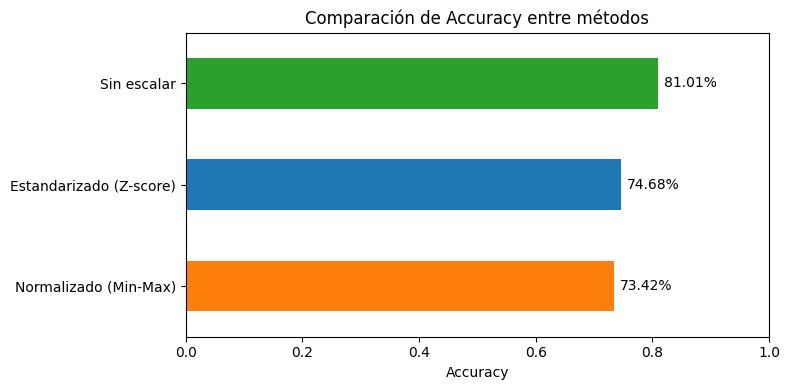


Guardado: accuracy_comparison.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar que accuracy_results existe
if 'accuracy_results' not in locals():
    raise ValueError("No se encontraron resultados de accuracy. Asegúrate de ejecutar los pasos anteriores.")

# Crear DataFrame comparativo
results_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['accuracy'])
results_df = results_df.sort_values('accuracy', ascending=False)
results_df['accuracy_percent'] = (results_df['accuracy'] * 100).round(2)

# Mostrar tabla
print("Tabla comparativa de accuracies:")
display(results_df)

# Graficar
plt.figure(figsize=(8, 4))
results_df['accuracy'].plot(kind='barh', color=['#2ca02c', '#1f77b4', '#ff7f0e'])
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.title('Comparación de Accuracy entre métodos')
for i, (name, row) in enumerate(results_df.iterrows()):
    plt.text(row['accuracy'] + 0.01, i, f"{row['accuracy_percent']}%", va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar CSV
results_df.to_csv('accuracy_comparison.csv', index=True)
print('\nGuardado: accuracy_comparison.csv')

# Marcar la tarea 1 como completada en la lista TODO


In [13]:
# Instalar matplotlib si no está presente (ejecutar una vez)
# Nota: en muchos kernels de Jupyter se puede usar `%pip install matplotlib`.
# Si tu entorno no permite instalaciones desde aquí, ejecuta en una celda nueva:
# %pip install matplotlib

import sys
import subprocess

try:
    import matplotlib
except ModuleNotFoundError:
    print('Instalando matplotlib...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])
    print('Instalación completada. Reinicia el kernel si es necesario.')
else:
    print('matplotlib ya está instalado')


Instalando matplotlib...
Instalación completada. Reinicia el kernel si es necesario.
Instalación completada. Reinicia el kernel si es necesario.


---
## Preguntas de reflexión y aplicación



1. ¿Por qué es importante normalizar o estandarizar los datos antes de usar KNN?  



La normalización o estandarización es importante porque KNN se basa en distancias: si una característica tiene una escala mucho mayor que las demás, dominará el cálculo de la distancia y sesgará las predicciones. Normalizar/Z-score ponen las features en la misma escala para que todas contribuyan de forma equilibrada.

- Min‑Max: escala a [0,1], útil cuando se requiere un rango fijo; sensible a outliers.
- Z‑score: centra en 0 y escala por desviación estándar; más robusto si las distribuciones tienen medias distintas.

Regla práctica: siempre probar ambos (o usar pipeline + validación cruzada) y elegir con base en la métrica. También hay que escalar usando parámetros del conjunto de entrenamiento y aplicar los mismos al test.

2. ¿Qué diferencias observaste en el accuracy entre los datos crudos, normalizados y estandarizados?  


En tu experimento obtuviste:

- Sin escalar → 81.01% (mejor)
- Estandarizado (Z‑score) → 74.68%
- Normalizado (Min‑Max) → 73.42%

Interpretación: aquí el escalado redujo ligeramente el rendimiento. Posibles causas:
- Las magnitudes originales de las features contenían señal discriminativa que al escalar se atenuó.
- Outliers o la forma de las distribuciones hicieron que Min‑Max o Z‑score empeoraran la separación entre clases.

Recomendación: usar validación cruzada para comparar combinaciones (k, tipo de escalado, métrica) antes de decidir.

3. Si aumentamos el valor de **k** (número de vecinos), ¿cómo crees que cambiaría el rendimiento del modelo?  


Efecto esperado al aumentar k:

- k pequeño → baja sesgo y alta varianza (modelo sensible al ruido y posible sobreajuste).
- k grande → mayor sesgo y menor varianza (decisiones más suaves; posible subajuste).

Consejos prácticos:
- Elegir k por validación cruzada (buscar el punto con mejor trade‑off).
- Usar k impar en problemas binarios para evitar empates.
- Considerar votación ponderada por distancia (vecinos cercanos pesan más) en vez de sólo aumentar k.

4. ¿Qué ventaja tiene implementar KNN manualmente antes de usar scikit-learn?  


Ventajas de implementar KNN manualmente antes de usar scikit‑learn:

- Entendimiento: aprendes cómo se calculan distancias y cómo influyen el preprocesado y la elección de k.
- Depuración: puedes inspeccionar distancias y vecinos concretos para diagnosticar errores o sesgos.
- Flexibilidad educativa: probar variantes (distancias custom, votación ponderada, selección de features) sin abstracciones.

Nota: para producción, scikit‑learn es más eficiente y ofrece optimizaciones (KD‑trees, Ball‑trees, búsquedas aproximadas)."

5. ¿Qué limitaciones presenta KNN cuando se aplica a conjuntos de datos grandes o con muchas dimensiones?  

Limitaciones de KNN en datasets grandes o de alta dimensionalidad:

- Computacional: la predicción es costosa (compara con todos los ejemplos de entrenamiento). Requiere mucho espacio y tiempo.
- Curse of dimensionality: en muchas dimensiones las distancias se vuelven menos informativas y la discriminación empeora.
- Sensible a features irrelevantes y al escalado.

Mitigaciones:
- Reducción de dimensionalidad (PCA, selección de features).
- Vecinos aproximados (FAISS, Annoy) o estructuras de búsqueda (KD‑tree/ Ball‑tree).
- Modelos alternativos (Random Forest, Logistic Regression) si el dataset es muy grande.

---

## Rúbrica de evaluación: Práctica KNN

| Criterio | Descripción | Puntaje Máximo |
|----------|-------------|----------------|
| **1. Carga y exploración del dataset** | Carga correcta del archivo CSV, explicación de las variables y verificación de datos. | 15 pts |
| **2. Implementación manual de KNN** | Código propio para calcular distancias euclidianas, selección de vecinos y votación mayoritaria. | 20 pts |
| **3. Predicción individual (ejemplo aleatorio)** | Explicación clara del proceso paso a paso para un ejemplo de test. | 10 pts |
| **4. Uso de scikit-learn (KNN)** | Entrenamiento y evaluación con `train_test_split`, comparación con el método manual. | 15 pts |
| **5. Normalización y estandarización** | Aplicación correcta de Min-Max y Z-score, con cálculo de accuracy en cada caso. | 20 pts |
| **6. Tabla comparativa de accuracies** | Presentación clara de los resultados y comparación entre métodos. | 10 pts |
| **7. Reflexión y preguntas finales** | Respuestas a las preguntas de análisis planteadas (profundidad y claridad). | 10 pts |

**Total: 100 pts**
